In [58]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [59]:
def haversine_distance(p1,p2):
    lg1 = p1[0]
    lat1 = p1[1]
    lg2 = p2[0]
    lat2 = p2[1]

    R = 6371000
    phi1 = lat1 * pi / 180 #convert to radian
    phi2 = lat2 * pi / 180 #convert to radian
    delta_phi = (lat2 - lat1) * pi / 180
    delta_lambda = (lg2 - lg1) * pi / 180

    a = (sin(delta_phi/2))**2 + cos(phi1) * cos(phi2) * ((sin(delta_lambda/2))**2)
    c = 2 * arctan2(sqrt(a), sqrt(1-a))
    distance = R * c #haversine distance between point1 and point 2 in meters
    return round(distance, 2)

In [68]:
flname="dataset_cluster_warehouse_exp_1.csv"
current_loc = (-6.221509, 106.819269)
df = pd.read_csv(flname)
df


,province_name,city_name,district_name,lat_long,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,"-6.1548792,106.7204645",153,230,2300.0,14000.0
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,"-6.1639643,106.7506821",387,581,3700.0,35000.0
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,"-6.1461655,106.8106198",114,171,7400.0,35400.0
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,"-6.146188,106.8079118",36,54,4700.0,35800.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,"-6.1915513,106.7481174",771,1157,7000.0,20700.0
...,...,...,...,...,...,...,...,...
63,JAWA BARAT,KOTA DEPOK,BEJI,"-6.3723053,106.7830725",378,832,NaN,NaN
64,JAWA BARAT,KOTA DEPOK,CIMANGGIS,"-6.3723053,106.7830725",231,508,NaN,NaN
65,JAWA BARAT,KOTA DEPOK,CINERE,"-6.3324008,106.7732734",495,1089,NaN,NaN
66,JAWA BARAT,KOTA DEPOK,LIMO,"-6.3663032,106.7621014",264,581,NaN,NaN


In [95]:
# add distancce in dataframe from current loc
l_distance = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    l_distance.append(haversine_distance( (lat,long), current_loc ))

df = df.assign(distance = l_distance)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157
...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832
64,KOTA DEPOK,CIMANGGIS,231,508
65,KOTA DEPOK,CINERE,495,1089
66,KOTA DEPOK,LIMO,264,581


In [96]:
#Splitting

In [97]:
#Data Cleansing
df.isna().sum()

province_name           0
city_name               0
district_name           0
lat_long                0
avg_demand_baseline     0
demand_target           0
njop_2021_min          34
njop_2021_max          34
distance                0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province_name        68 non-null     object 
 1   city_name            68 non-null     object 
 2   district_name        68 non-null     object 
 3   lat_long             68 non-null     object 
 4   avg_demand_baseline  68 non-null     int64  
 5   demand_target        68 non-null     int64  
 6   njop_2021_min        34 non-null     float64
 7   njop_2021_max        34 non-null     float64
 8   distance             68 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.9+ KB


In [99]:
df.describe()

,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max,distance
count,68.000000,68.000000,34.000000,34.000000,68.000000
mean,320.647059,566.029412,2955.882353,27758.852941,9069.908382
std,226.066148,374.383512,1560.339275,20948.206807,6653.713075
min,33.000000,54.000000,1400.000000,5095.000000,710.540000
25%,152.250000,266.750000,1757.000000,15640.000000,3609.425000
50%,285.000000,508.000000,2430.000000,22302.500000,7643.600000
75%,405.750000,752.250000,3375.000000,35000.000000,13424.042500
max,1197.000000,1796.000000,7400.000000,95580.000000,29273.370000


In [100]:
#Rescaling
scaler = StandardScaler()
dataset_to_scale = dataset[['avg_demand_baseline','demand_target']]
dataset_scaled = scaler.fit_transform(dataset_to_scale)
dataset_scaled

array([[-0.7470978 , -0.90422734],
       [ 0.29569345,  0.04028461],
       [-0.92089634, -1.06299145],
       [-1.26849343, -1.37782877],
       [ 2.00694062,  1.59025294],
       [-0.66688309, -0.83157257],
       [ 0.99088761,  0.66995925],
       [ 0.02831107, -0.20189794],
       [ 1.76629649,  1.37228865],
       [-0.26580953, -0.46829874],
       [-0.07864187, -0.29877096],
       [ 3.90535546,  3.30974906],
       [ 0.26895521,  0.01606636],
       [ 0.97751849,  0.65650466],
       [ 0.06841843, -0.16691601],
       [-0.21233306, -0.41986223],
       [ 1.01762585,  0.6941775 ],
       [ 0.46949199,  0.19635781],
       [ 0.20210962,  0.25017616],
       [-1.12143312, -1.18946456],
       [-1.26849343, -1.34822868],
       [ 0.36253904,  0.42508578],
       [-0.06527276, -0.0404429 ],
       [-0.86741987, -0.91230009],
       [-0.98774194, -1.04415503],
       [-0.26580953, -0.2584072 ],
       [-0.76046692, -0.79659065],
       [-0.97437282, -1.02800953],
       [-1.26849343,

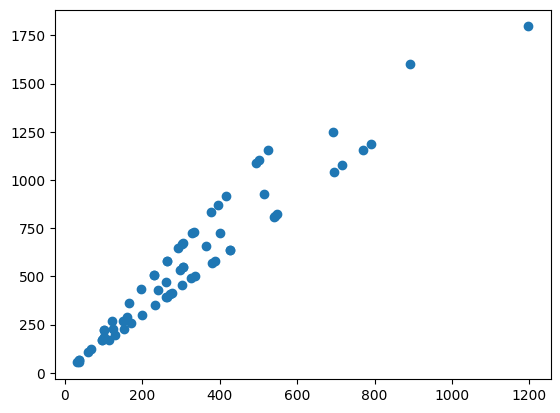

In [101]:
# Visualisasi data awal
plt.scatter(df['avg_demand_baseline'], df['demand_target'])

In [102]:
#
#TODO: Elbow method untuk menentukan n-cluster optimal
km = KMeans(
    init="random",
    n_clusters=3,
    max_iter=100
)
km.fit(dataset_scaled)

KMeans(init='random', max_iter=100, n_clusters=3)

In [103]:
clusters = km.cluster_centers_
print(clusters)

[[-0.03393888  0.0280073 ]
 [ 1.57148933  1.52067351]
 [-0.95067302 -1.00843922]]


In [111]:
y_km = km.fit_predict(dataset_scaled)
dataset = dataset.assign(pred=y_km)
dataset[dataset['pred']==1]

,city_name,district_name,avg_demand_baseline,demand_target,pred
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,1
8,KOTA ADMINISTRASI JAKARTA SELATAN,CILANDAK,717,1076,1
11,KOTA ADMINISTRASI JAKARTA SELATAN,KEBAYORAN LAMA,1197,1796,1
29,KOTA ADMINISTRASI JAKARTA UTARA,KELAPA GADING,693,1247,1
32,KOTA ADMINISTRASI JAKARTA UTARA,PENJARINGAN,891,1604,1
38,KOTA ADMINISTRASI JAKARTA PUSAT,MENTENG,792,1188,1
41,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,696,1044,1
52,KOTA TANGERANG SELATAN,CIPUTAT,525,1155,1
56,KOTA TANGERANG SELATAN,SERPONG,501,1102,1
65,KOTA DEPOK,CINERE,495,1089,1


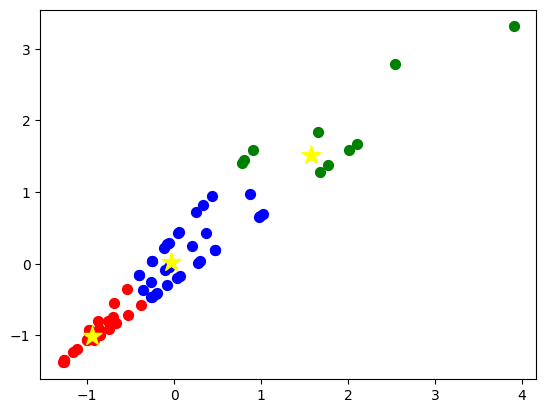

In [112]:
plt.scatter(dataset_scaled[y_km==0,0], dataset_scaled[y_km==0,1], s=50, color='red')
plt.scatter(dataset_scaled[y_km==1,0], dataset_scaled[y_km==1,1], s=50, color='green')
plt.scatter(dataset_scaled[y_km==2,0], dataset_scaled[y_km==2,1], s=50, color='blue')

plt.scatter(clusters[0][0], clusters[0][1], marker="*", s=200, color="yellow")
plt.scatter(clusters[1][0], clusters[1][1], marker="*", s=200, color="yellow")
plt.scatter(clusters[2][0], clusters[2][1], marker="*", s=200, color="yellow")

plt.show()